In [ ]:
%pip install qiskit==1.2.4
%pip install qiskit-aer==0.15.1
%pip install pylatexenc==2.10

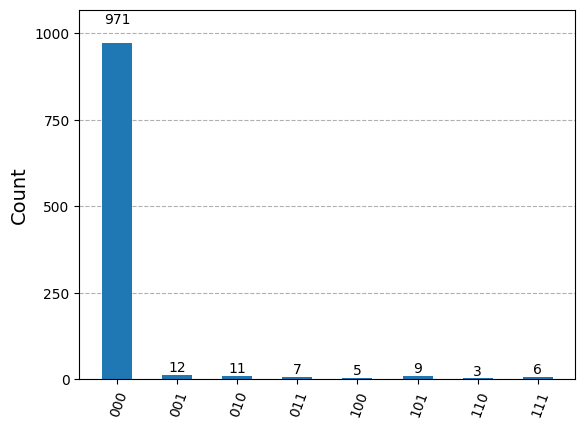

In [2]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_gate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import transpile 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit import ControlledGate

# Grover's algorithm
# Given a function f : {0,1}^n -> {0,1} such that for some input vector w,
# f(w) = 1 and for all x != w, f(x) = 0.
# The problem is to find w.

# Here we work with 3 qubits

# First we need a definition of f.

# Let's say f(0,0,0) = 1
# Try changing this to represent different search targets (you will need to change the definition of U, below)

# Then we need to define a unitary operator U on 3 qubits, such that
# U|x> = -|x> if f(x) = 1
# U|x> =  |x> if f(x) = 0

U = Operator([
    [-1, 0, 0, 0, 0, 0, 0, 0],
    [0,1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Now construct the Grover diffusion operator

G_matrix = list(map(lambda x: list(map(lambda y: y/4.0,x)),[ 
    [-3,1, 1, 1, 1, 1, 1, 1], 
    [1,-3, 1, 1, 1, 1, 1, 1], 
    [1, 1,-3, 1, 1, 1, 1, 1], 
    [1, 1, 1,-3, 1, 1, 1, 1], 
    [1, 1, 1, 1,-3, 1, 1, 1], 
    [1, 1, 1, 1, 1,-3, 1, 1], 
    [1, 1, 1, 1, 1, 1,-3, 1], 
    [1, 1, 1, 1, 1, 1, 1,-3]
]))

G = Operator(G_matrix) 

# Build a circuit with the correct number of iterations hard-coded, in this case 2

grover = QuantumCircuit(3) 

# To get the initial state, apply H to every qubit

grover.h(0) 
grover.h(1) 
grover.h(2) 

# Repeatedly apply U then G

grover.append(U,[0,1,2])
grover.append(G,[0,1,2])
grover.append(U,[0,1,2])
grover.append(G,[0,1,2])

# What if we do too many iterations?

#grover.append(U,[0,1,2])
#grover.append(G,[0,1,2])

# Measure all the qubits - to do that, we don't need to introduce classical bits

grover.measure_all() 

# Simulate and plot results

backend = BasicSimulator()
compiled = transpile(grover, backend)
job_sim = backend.run(compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)
plot_histogram(counts)